# Teil a)
Korrelationskoeffizient

$\begin{align*}
  \rho (x, y) &= \frac{\text{cov}(x,\, x)}{\sigma_x \cdot \sigma_y}
  = \frac{4,2}{3,5 \cdot 1,5} = 0,8
\end{align*}$

# Teil b)
Wahrscheinlichkeitsdichte einer 2-dimensionalen Gaußverteilung:

$\begin{equation*}
  \phi(x,y) = k \cdot \exp(-\frac{1}{2} \, \vec{u}^\top \text{B} \vec{u})
\end{equation*}$

mit

$\begin{equation*}
\vec{u} = (u_1, u_2)^\top, u_1 = \frac{x-a_1}{\sigma_1}, u_2 = \frac{y-a_2}{\sigma_2}
\end{equation*}$

$\phi(x,y)$ soll konstant sein $\to$ Exponent muss konstant sein
$\to \vec{u}^\top \text{B} \vec{u}$ konstant

$\begin{equation}
  \text{B} = \frac{1}{1 - \rho}
  \begin{pmatrix}
    1 & -\rho \\
    -\rho & 1
  \end{pmatrix}
\end{equation}$

$\to \begin{equation}
  \vec{u}^\top \text{B} \vec{u} =
  \frac{1}{1-\rho^2} (u_1, u_2)
 \end{equation}$
 $\begin{equation}
  \begin{pmatrix}
    1 & -\rho \\
    -\rho & 1
  \end{pmatrix}
  \begin{pmatrix}
    u_1 \\
    u_2
  \end{pmatrix}
  \end{equation}$
  
  $\begin{equation}
  = \frac{1}{1-\rho^2} (u_1, u_2)
  \begin{pmatrix}
    u_1 - \rho u_2 \\
    \rho u_1 + u_2
  \end{pmatrix}
  \end{equation}$
 
 $\begin{equation}
  = \frac{1}{1-\rho^2} (u_1, u_2)
  \begin{pmatrix}
    u_1 - \rho u_2 \\
    \rho u_1 + u_2
  \end{pmatrix}
  \end{equation}$
  
  $\begin{equation}
  = \frac{1}{1-\rho^2} (u_1^2 - \rho u_2 u_1 - \rho u_1 u_2 + u_2^2)
  \end{equation}$
  
$\begin{equation}
  = \frac{1}{1-\rho^2} (u_1^2 - 2\rho u_1 u_2 + u_2^2)
\end{equation}$
    
$\begin{equation}
  \implies \text{konst.} \cdot (1 - \rho^2) = u_1^2 - 2\rho u_1 u_2 + u_2^2
\end{equation}$

Die letzte Gleichung entspricht einer Ellipsengleichung.

# Teil b) 
## Bildliches Zeigen

kann auch Bildlich an den unterschiedlich gefärbten Ellipsen gesehen werden

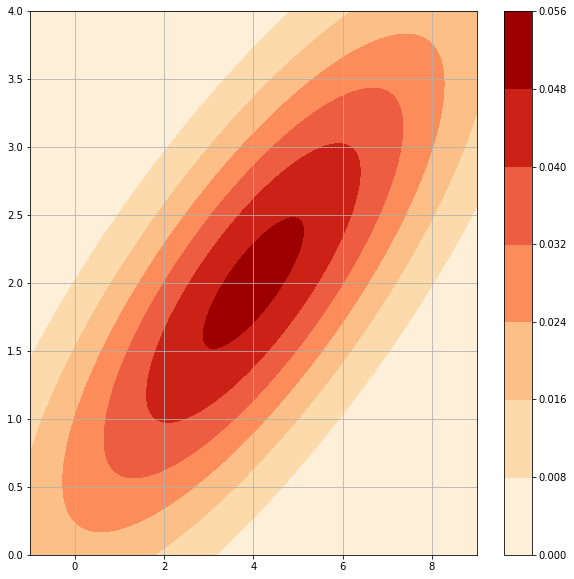

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
plt.rcParams['figure.figsize']=(10,10)
nstd = 2
mu_x = 4
mu_y = 2
rho = 0.8
sigma_x = 3.5
sigma_y = 1.5
cov = 4.2
def f(x, y, rho, mu_x, mu_y, sigma_x, sigma_y):
    return 1/(2*np.pi*sigma_x*sigma_y*np.sqrt(1-rho**2))*np.exp(-1/(2*(1 - rho**2))*((x - mu_x)**2 / (sigma_x**2) 
                                                                                     + (y - mu_y)**2 / (sigma_y**2) - 
                                    2*rho*(x - mu_x)*(y - mu_y)/(sigma_x*sigma_y)))
plt.grid()
x = np.linspace(-1.0, 9.0,2000)
y = np.linspace(0, 4.0,2000)
X, Y = np.meshgrid(x, y)
func = f(X, Y, rho, mu_x, mu_y, sigma_x, sigma_y)
plt.contourf(X, Y, func, cmap='OrRd')
#print(1/(np.sqrt(np.exp(1))*2*np.pi*sigma_x*sigma_y*np.sqrt(1-rho**2)))
#print(1/(2*np.pi*sigma_x*sigma_y*np.sqrt(1-rho**2)))
plt.colorbar()
plt.show()

# Teil c) und d) - Zeichnung

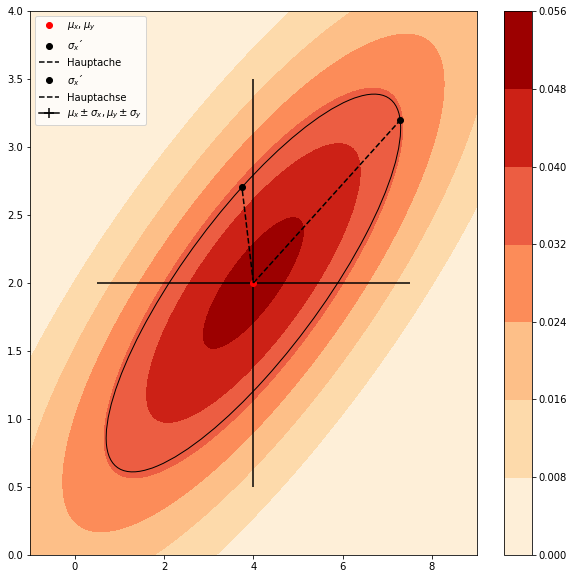

In [2]:
ax = plt.subplot(111)
theta=20.01512964
ell = Ellipse(xy=(4, 2),
              width=3.5*2, height=1.5,
              angle=theta, color='black', label='1/\sqrt{e}')
ell.set_facecolor('none')
ax.add_artist(ell)
plt.contourf(X, Y, func, cmap='OrRd')
plt.errorbar(mu_x, mu_y, xerr=sigma_x, yerr=sigma_y, color='black',capthick=2,
             label=r'$\mu_x \pm \sigma_x, \mu_y \pm \sigma_y$')
plt.plot(mu_x,mu_y,'ro', label=r'$\mu_x, \mu_y$')
sigma_x_x=[4,4+3.2886]
sigma_x_y=[2,2+1.1979]
plt.plot(4+3.2886, 2+1.1979,'ko',label=r"$\sigma_x´$")
plt.plot(sigma_x_x, sigma_x_y, 'k--', label='Hauptache')
sigma_x_x=[4,4-0.5*0.5134]
sigma_x_y=[2,2+0.5*1.4094]
plt.plot(4-0.5*0.5134, 2+0.5*1.4094,'ko', label=r"$\sigma_x´$")
plt.plot(sigma_x_x, sigma_x_y, 'k--', label='Hauptachse')
plt.colorbar()
plt.legend(loc='best')
plt.show()